In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import gamma

# Malédiction de la dimension

## Biais de distance

Comment évolue la distance entre 2 points dans une boule en fonction de la dimension ?

### Solution

In [2]:
npts= 1000
dim = 900 # À faire bouger !!

In [3]:
x = np.random.uniform(low=-1,high=1, size=(npts, dim))
y = np.random.uniform(low=-1,high=1, size=(npts, dim))
distance_vector = np.linalg.norm(x-y, axis=0)
# distance_vector = [norm(x-y) for i,x in enumerate(pts) for j,y in enumerate(pts) if i != j ]

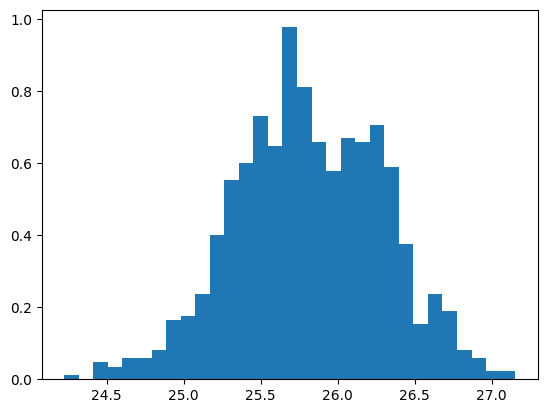

In [4]:
plt.hist(distance_vector, density=1, bins = int(np.sqrt(npts)))
plt.show()

## Volume d'une boule

Comment évolue le volume de la boule unité en fonction de la dimension ?

### Solution

Rmq : Il faut regarder le nb "curse of dimensionality" pour la théorie.

In [10]:
def volume_boule_estimé(dim, npts=1_000_000):
    pts = np.random.uniform(low=-1, high=1, size=(npts, dim))
    npts_danslaboule = np.mean(norm(pts,axis=1) <=1)
    return (npts_danslaboule)*(2**dim)
def volume_boule_exact(dim):
    return np.pi**(dim/2) / gamma(dim/2+1)

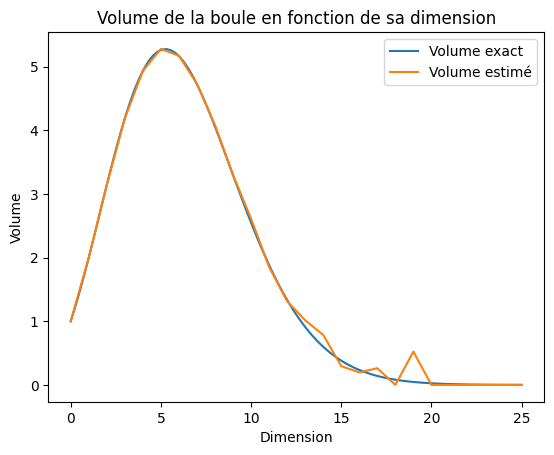

In [11]:
x = np.linspace(0,25,100)
plt.plot(x, [volume_boule_exact(z) for z in x],label="Volume exact")
x=range(26)
plt.plot(x, [volume_boule_estimé(z) for z in x],label="Volume estimé")
plt.xlabel("Dimension")
plt.ylabel("Volume")
plt.title("Volume de la boule en fonction de sa dimension")
plt.legend()
plt.show()

## Volume dans la croute de la boule

Quelle proportion du volume de la boule est dans la croute de l'anneau, en fonction de la dimension ?

On prendra la croute de la boule comme étant les gens $x$ de norme $0.99<\Vert x \Vert \le 1$

### Solution

Text(0, 0.5, 'Proportion dans la croute de la boule')

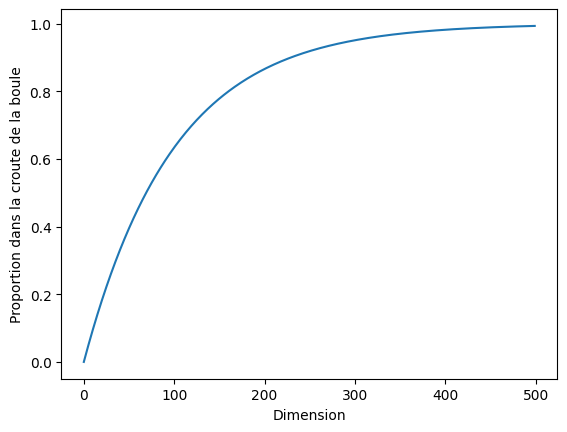

In [7]:
x = range(500)
plt.plot(x, [1-0.99**t for t in x])
plt.xlabel("Dimension")
plt.ylabel("Proportion dans la croute de la boule")

## Concentration Gaussienne

Comment évolue la concentration de la loi gaussienne en fonction de la dimension ?

On pourra se convaincre avec un histogramme.

### Solution

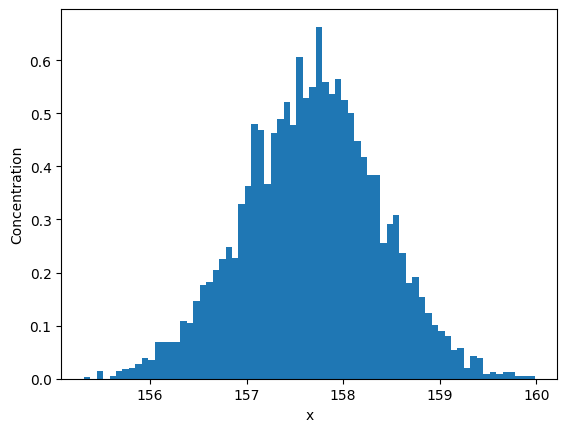

In [12]:
npts = 5000
dim = 24857
x = np.random.normal(size = (npts, dim))
plt.hist(norm(x, axis=1), bins = int(np.sqrt(npts)), density=1)
plt.xlabel("x")
plt.ylabel("Concentration")
plt.show()

## Loi du maximum d'une gaussienne ?

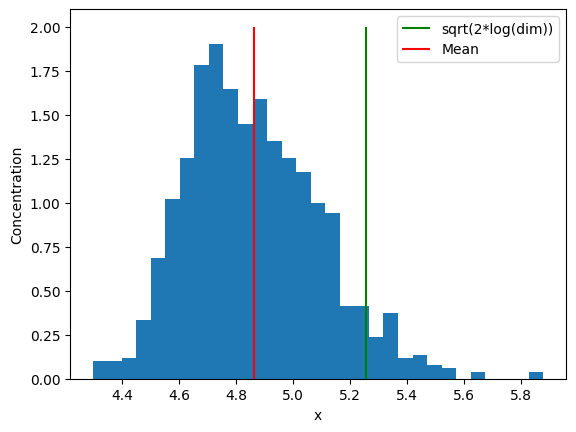

In [13]:
npts = 1000
dim = 1_000_857
x = np.random.normal(size = (npts, dim))
maxes = [np.max(z) for z in x]
plt.hist(maxes, bins = int(np.sqrt(npts)), density=1)
plt.xlabel("x")
plt.ylabel("Concentration")
plt.vlines([np.sqrt(2*np.log(dim))], [0], [2], color="g", label=f"sqrt(2*log(dim))")
plt.vlines( [np.mean(maxes)], [0], [2], color="r", label="Mean")
plt.legend()
plt.show()